# **Pre-process a Benchmark Dataset: HRPlanes**

<p align="center">
    <img src="https://raw.githubusercontent.com/RSandAI/HRPlanes/main/Assets/HRPlanes%20Header.png" height=400 width=1000 alt="Ultralytics">
</p>

<small>Picture Source: <a href="https://github.com/RSandAI/HRPlanes">RSandAI</a></small>

<br>

Airplane detection from satellite imagery is a challenging task due to the complex backgrounds in the images and differences in data acquisition conditions caused by the sensor geometry and atmospheric effects. Deep learning methods provide reliable and accurate solutions for automatic detection of airplanes; however, huge amount of training data is required to obtain promising results. In this study, we create a novel airplane detection dataset called High Resolution Planes (HRPlanes) by using images from Google Earth (GE) and labeling the bounding box of each plane on the images. HRPlanes include GE images of several different airports across the world to represent a variety of landscape, seasonal and satellite geometry conditions obtained from different satellites.

<br>

The dataset includes 3101 RGB images of major airports and aircraft boneyards, manually annotated with bounding boxes for airplanes using Plainsight (formerly HyperLabel). Quality control was conducted independently, resulting in 18,477 annotated airplanes. The dataset is split into 70% training (2170 images), 20% validation (620 images), and 10% testing (311 images) sets.

<br>

- Dataset address: [HRPlanes GitHub Repository](https://github.com/RSandAI/HRPlanes)

- Remote Sensing AI GitHub link: [RSandAI](https://github.com/RSandAI)

- Research article: [DergiPark](https://dergipark.org.tr/en/pub/ijeg/issue/77206/1107890)

<br>

## **Table of Contents**

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#appropriate_environment">0. Importing Libraries</a></li>
<li><a href="https://#libraries">1. Split TXT and JPG Files</a></li>
<li><a href="https://#data_preparation">2. Move Files into Drive Folder</a></li>

<br>

<p></p>
Estimated Time Needed: <strong>60 min</strong>
</div>

<br>

## **0. Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
import shutil
import matplotlib.pyplot as plt

## **1. Split TXT and JPG Files**

After accessing the dataset from [Google Drive](https://drive.google.com/drive/folders/1NYji6HWh4HRLQMTagsn4tTv4LOdDrc9P?usp=sharing), **you need to create a shortcut to easily make modifications**. [Here](https://towardsdatascience.com/simplify-file-sharing-44bde79a8a18) you can find how to do it.

### **1.1. Build Functions**

This functions will extract the file name from the paths in train.txt, validation.txt, and test.txt files and move them into new folders names `train`, `val` and `test`.

In [ ]:
def create_folders(dataset):
    os.makedirs(dataset + '/images', exist_ok=True)
    os.makedirs(dataset + '/labels', exist_ok=True)

def copy_files(dataset, txt_path):
    with open(txt_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            file_path = line.strip().split('/')[-1]
            file_name, _ = os.path.splitext(file_path)
            img_src = os.path.join(img_folder, file_path)
            label_src = os.path.join(img_folder, file_name + '.txt')
            img_dest = os.path.join(dataset, 'images', file_path)
            label_dest = os.path.join(dataset, 'labels', file_name + '.txt')
            shutil.copy(img_src, img_dest)
            shutil.copy(label_src, label_dest)

def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

### **1.2. Seperate Files**

Our `img_folder` variable is used to store the path to the folder where your image and label files are located. In this context, it is used in a script that processes image and label files for a machine learning task using the YOLO (You Only Look Once) model.

In [ ]:
img_folder = '/gdrive/MyDrive/Datasets/HRPlanes YOLO/img/' # @param {type:"string"}

Next, you need to define where the `train.txt`, `validation.txt` and `test.txt` files.

In [ ]:
train_txt_path = '/gdrive/MyDrive/Datasets/HRPlanes YOLO/train.txt' # @param {type:"string"}
val_txt_path = '/gdrive/MyDrive/Datasets/HRPlanes YOLO/validation.txt' # @param {type:"string"}
test_txt_path = '/gdrive/MyDrive/Datasets/HRPlanes YOLO/test.txt' # @param {type:"string"}

Create folders named `train`, `val` and `test`.

In [ ]:
create_folders('/content/train')
create_folders('/content/val')
create_folders('/content/test')

Copy JPG files to `images` folder and TXT files to `labels` folder. This may take a while.

In [ ]:
copy_files('/content/train', train_txt_path)
copy_files('/content/val', val_txt_path)
copy_files('/content/test', test_txt_path)

### **1.3. Print and Plot Number of Files**

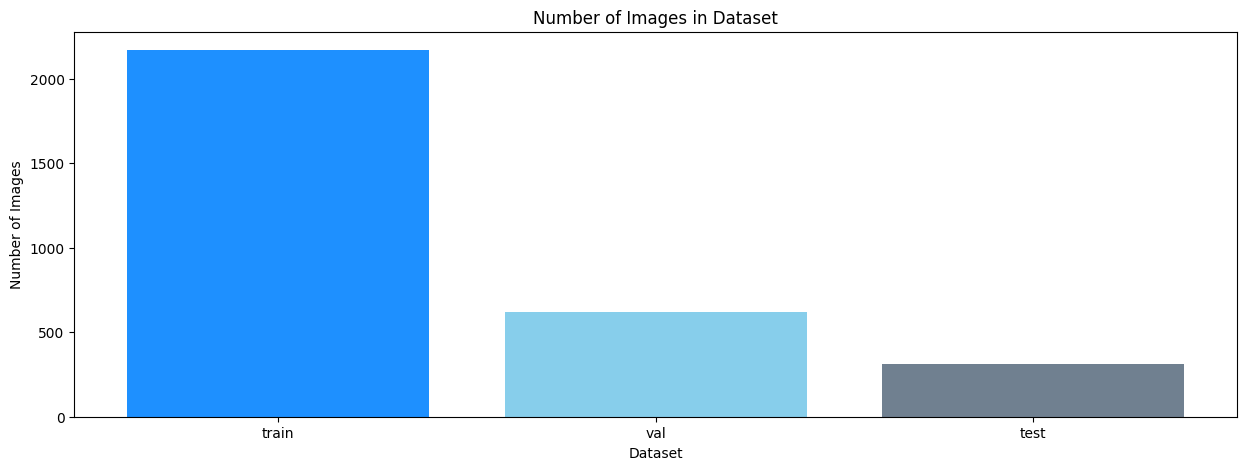

In [ ]:
directories = ['/content/train/images', '/content/val/images', '/content/test/images']
labels = ['train', 'val', 'test']
colors = ['dodgerblue', 'skyblue', 'slategray']

counts = [count_files(directory) for directory in directories]
plt.figure(figsize=(15, 5))
plt.bar(labels, counts, color=colors)
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Number of Images in Dataset')
plt.show()

In [ ]:
num_images = count_files('/content/train/images')
print(f"Number of images in 'train/images': {num_images}")

Number of images in 'train/images': 2170


In [ ]:
num_images = count_files('/content/val/images')
print(f"Number of images in 'val/images': {num_images}")

Number of images in 'val/images': 620


In [ ]:
num_images = count_files('/content/test/images')
print(f"Number of images in 'test/images': {num_images}")

Number of images in 'test/images': 311


## **2. Move Files into Drive Folder**

Instead of uploading and downloading files, we can directly move them to the desired path. You need to select where the TXT and JPG images are stored in the `train`, `val`, and `test` folders.

In [ ]:
import shutil
shutil.move("/content/train", "/gdrive/MyDrive/Datasets/HRPlanes/")
shutil.move("/content/val", "/gdrive/MyDrive/Datasets/HRPlanes/")
shutil.move("/content/test", "/gdrive/MyDrive/Datasets/HRPlanes/")

In [ ]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2024-02-25 19:56:30
